In [1]:
from keras.datasets import fashion_mnist as mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("The MNIST database has a training set of %d examples." % len(X_train))

print("The MNIST database has a test set of %d examples." % len(X_test))

4431872/4422102 [==============================] - 8s 2us/step
The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


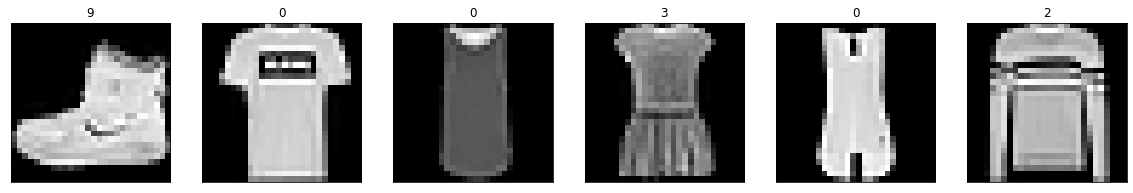

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np

# plotting first six training images
fig = plt.figure(figsize=(20,20))
for i in range(6):
    ax = fig.add_subplot(1, 6, i+1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(str(y_train[i]))

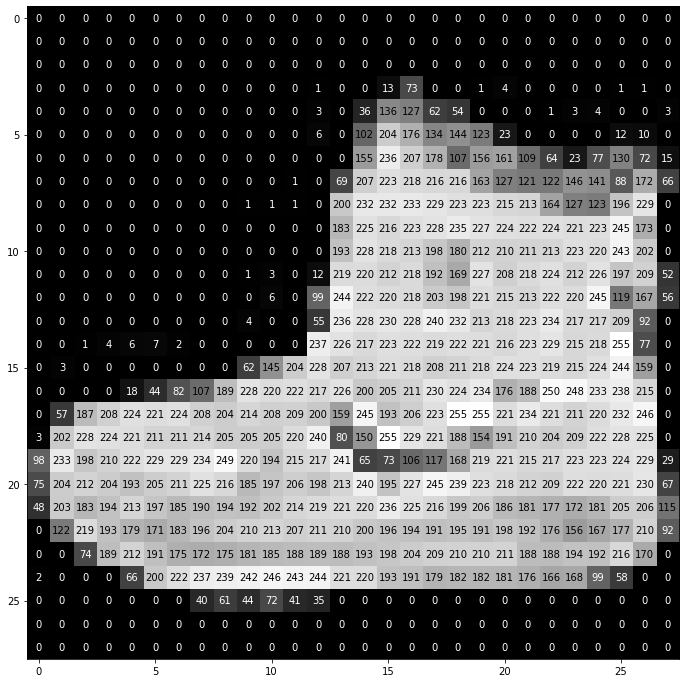

In [3]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')

fig = plt.figure(figsize = (12,12)) 
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

In [4]:
X_train = X_train.astype('float32')/255

X_test = X_test.astype('float32')/255
from keras.utils import np_utils

# print first ten (integer-valued) training labels
print('Integer-valued labels:')
print(y_train[:10])

# one-hot encode the labels
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

# print first ten (one-hot) training labels
print('One-hot labels:')
print(y_train[:10])

Integer-valued labels:
[9 0 0 3 0 2 7 2 5 5]
One-hot labels:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# define the model
model = Sequential()
model.add(Flatten(input_shape=X_train.shape[1:]))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

# summarize the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trai

In [6]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
              metrics=['accuracy'])
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 10.1900%


In [7]:
from keras.callbacks import ModelCheckpoint   

# train the model
checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size=128, epochs=10,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=1, shuffle=True)

Epoch 1/10
369/375 [============================>.] - ETA: 0s - loss: 0.5991 - accuracy: 0.7814 ETA: 0s - loss: 0.6782 - ac - ETA: 0s - loss: 0.6298 - ac
Epoch 00001: val_loss improved from inf to 0.43418, saving model to mnist.model.best.hdf5
375/375 [==============================] - 3s 6ms/step - loss: 0.5973 - accuracy: 0.7823 - val_loss: 0.4342 - val_accuracy: 0.8403
Epoch 2/10
367/375 [============================>.] - ETA: 0s - loss: 0.4161 - accuracy: 0.8474
Epoch 00002: val_loss improved from 0.43418 to 0.38379, saving model to mnist.model.best.hdf5
375/375 [==============================] - 2s 6ms/step - loss: 0.4175 - accuracy: 0.8474 - val_loss: 0.3838 - val_accuracy: 0.8621
Epoch 3/10
374/375 [============================>.] - ETA: 0s - loss: 0.3788 - accuracy: 0.8610
Epoch 00003: val_loss improved from 0.38379 to 0.34642, saving model to mnist.model.best.hdf5
375/375 [==============================] - 2s 6ms/step - loss: 0.3784 - accuracy: 0.8611 - val_loss: 0.3464 - val_

In [8]:
model.load_weights('mnist.model.best.hdf5')
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 86.5000%
